# Anomaly Detection using Autoencoder
> by Dense Layer

<br/>
<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.__version__

'2.4.1'

<br/>
<br/>
<br/>
<br/>

## Data

In [2]:
df = pd.read_csv('datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum().sum()

0

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<br/>
<br/>
<br/>
<br/>

## Ratio of Fraud

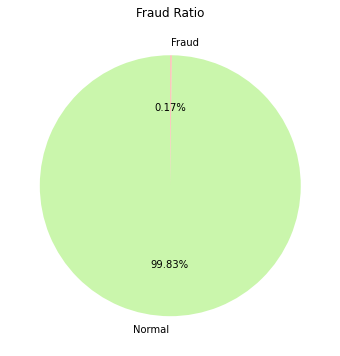

In [7]:
colors = ['#caf6ac', '#ffb3ad']

plt.figure(figsize = (6,6))

plt.pie(df['Class'].value_counts(),
        labels = ['Normal', 'Fraud'],
        colors = colors,
        autopct = '%.2f%%',
        startangle = 90)

plt.title('Fraud Ratio')
plt.show()

<br/>
<br/>
<br/>
<br/>

## Split into Normal & Fraud

In [8]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

df_fraud.shape, df_normal.shape

((492, 31), (284315, 31))

In [9]:
# Amount of fraud data
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
# Amount of normal data
df_normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

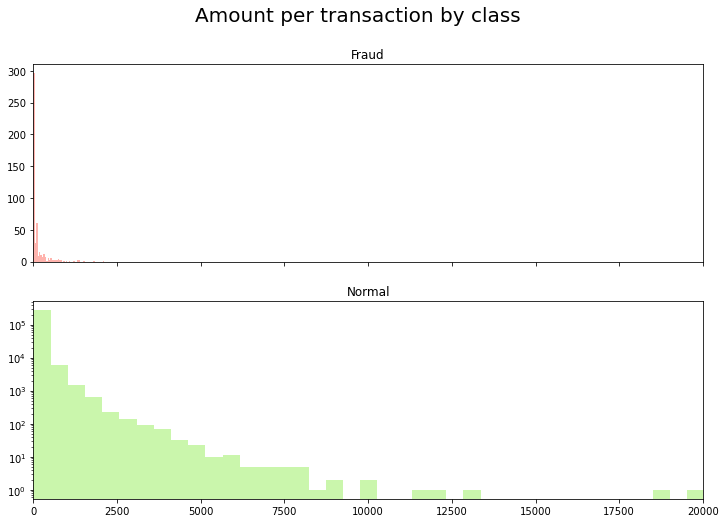

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (12,8))
fig.suptitle('Amount per transaction by class', fontsize = 20)

bins = 50

ax1.hist(df_fraud['Amount'], bins = bins, color = colors[1])
ax1.set_title('Fraud')

ax2.hist(df_normal['Amount'], bins = bins, color = colors[0])
ax2.set_title('Normal')

plt.xlim(0, 20000)
plt.yscale('log')
plt.show()

<br/>
<br/>
<br/>
<br/>

## Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

df = df.drop('Time', axis = 1)
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


<br/>
<br/>
<br/>
<br/>

## Split into train & test data

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42)
train = train[train['Class'] == 0] # train only normal data
train = train.drop('Class', axis = 1)

test, y_test = test.drop('Class', axis = 1), test['Class']

train = train.values
test = test.values

train.shape, test.shape, y_test.shape

((227451, 29), (56962, 29), (56962,))

<br/>
<br/>
<br/>
<br/>

## Modeling

In [15]:
from tensorflow.keras import models, layers

input_dim = train.shape[1] # 29
encoding_dim = input_dim // 2 # 14


#
# Modeling
#

input_layer = layers.Input(shape = (input_dim, ))

encoder = layers.Dense(encoding_dim, activation = 'tanh')(input_layer)
encoder = layers.Dense(encoding_dim // 2, activation = 'relu')(encoder)

decoder = layers.Dense(encoding_dim, activation = 'tanh')(encoder)
decoder = layers.Dense(input_dim)(decoder)

autoencoder = models.Model(input_layer, decoder)


#
# Compile
#

autoencoder.compile(loss = 'mean_squared_error',
                    optimizer = 'adam',
                    metrics = ['mse'])

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense (Dense)                (None, 14)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_3 (Dense)              (None, 29)                435       
Total params: 1,072
Trainable params: 1,072
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   patience = 5,
                   verbose = 1,
                   mode = 'min')

In [17]:
hist = autoencoder.fit(train, train,
                       epochs = 100,
                       batch_size = 32,
                       validation_data = (test, test),
                       callbacks = [es])

Epoch 1/100
7108/7108 [==============================] - 10s 1ms/step - loss: 0.6723 - mse: 0.6723 - val_loss: 0.4959 - val_mse: 0.4959
Epoch 2/100
7108/7108 [==============================] - 9s 1ms/step - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4432 - val_mse: 0.4432
Epoch 3/100
7108/7108 [==============================] - 8s 1ms/step - loss: 0.4030 - mse: 0.4030 - val_loss: 0.4152 - val_mse: 0.4152
Epoch 4/100
7108/7108 [==============================] - 8s 1ms/step - loss: 0.3679 - mse: 0.3679 - val_loss: 0.3927 - val_mse: 0.3927
Epoch 5/100
7108/7108 [==============================] - 12s 2ms/step - loss: 0.3596 - mse: 0.3596 - val_loss: 0.3797 - val_mse: 0.3797
Epoch 6/100
7108/7108 [==============================] - 8s 1ms/step - loss: 0.3380 - mse: 0.3380 - val_loss: 0.3783 - val_mse: 0.3783
Epoch 7/100
7108/7108 [==============================] - 9s 1ms/step - loss: 0.3305 - mse: 0.3305 - val_loss: 0.3665 - val_mse: 0.3665
Epoch 8/100
7108/7108 [==============================

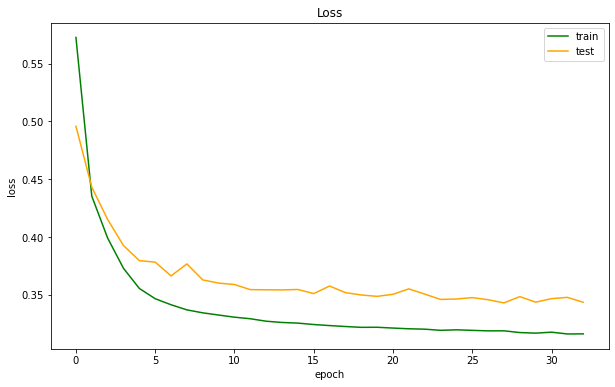

In [18]:
plt.figure(figsize = (10,6))
plt.plot(hist.history['loss'], color = 'green')
plt.plot(hist.history['val_loss'], color = 'orange')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<br/>
<br/>
<br/>
<br/>

## Predict & get MSE

In [19]:
pred = autoencoder.predict(test)

mse = np.mean(np.power(test - pred, 2), axis = 1)
df_error = pd.DataFrame({
    'error' : mse,
    'class' : y_test
})

df_error.head(10)

,error,class
43428,66.092341,1
49906,0.411464,0
29474,0.245525,0
276481,0.103767,0
278846,0.075973,0
101565,0.490777,0
260880,0.064451,0
214337,0.376418,0
201575,0.202428,0
81055,0.550634,0


In [20]:
df_error_normal = df_error[df_error['class'] == 0]
df_error_fraud = df_error[df_error['class'] == 1]

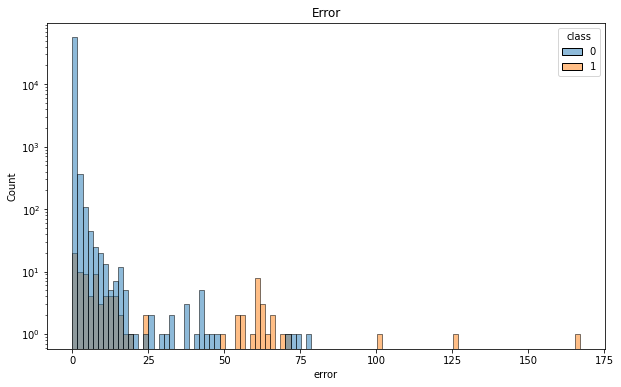

In [21]:
plt.figure(figsize = (10,6))
sns.histplot(data = df_error, x = 'error', hue = 'class', bins = 100)
plt.title('Error')
plt.yscale('log')
plt.show()

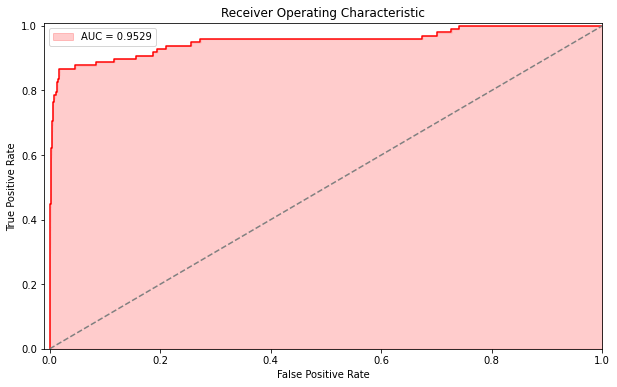

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(df_error['class'], df_error['error'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, c = 'red')
plt.fill_between(fpr, 0, tpr, color = 'red', label = 'AUC = %.4f'%roc_auc, alpha = 0.2)
plt.plot([0,1], [0,1], c = 'gray', linestyle = '--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

<br/>
<br/>
<br/>
<br/>

## Set Threshold

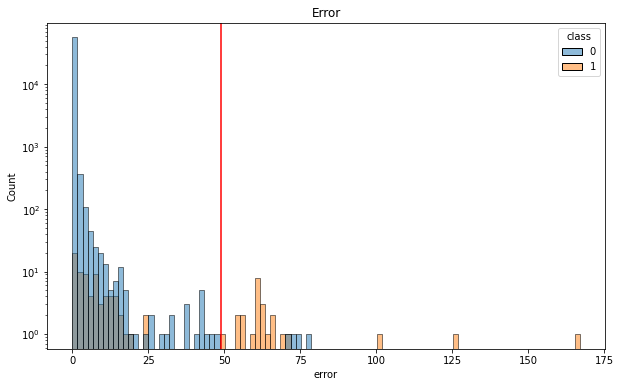

In [23]:
threshold = 49

plt.figure(figsize = (10,6))
sns.histplot(data = df_error, x = 'error', hue = 'class', bins = 100)
plt.axvline(threshold, color = 'red')
plt.title('Error')
plt.yscale('log')
plt.show()

In [24]:
df_error['fraud'] = df_error['error'].apply(lambda e : 1 if e > threshold else 0)
df_error.head(10)

,error,class,fraud
43428,66.092341,1,1
49906,0.411464,0,0
29474,0.245525,0,0
276481,0.103767,0,0
278846,0.075973,0,0
101565,0.490777,0,0
260880,0.064451,0,0
214337,0.376418,0,0
201575,0.202428,0,0
81055,0.550634,0,0


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy score : {accuracy_score(df_error['class'], df_error['fraud'])}")
print(f"Recall score : {recall_score(df_error['class'], df_error['fraud'])}")
print(f"Precision score : {precision_score(df_error['class'], df_error['fraud'])}")

Accuracy score : 0.9986482216214319
Recall score : 0.25510204081632654
Precision score : 0.8620689655172413


<br/>
<br/>
<br/>
<br/>

## Get data with a predicted value of 1

In [26]:
result = np.hstack([test, y_test.values.reshape(-1,1), df_error['fraud'].values.reshape(-1,1)])
result = pd.DataFrame(result, columns = [f'value_{i}' for i in range(test.shape[1])] + ['class', 'fraud'])
result.head(10)

,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28,class,fraud
0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834,1.0,1.0
1,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255,0.0,0.0
2,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289,0.0,0.0
3,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232,0.0,0.0
4,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671,0.0,0.0
5,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,-2.084080,...,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,0.046579,0.0,0.0
6,2.023952,-0.120140,-1.086918,0.423019,-0.142901,-1.127752,0.178493,-0.303234,0.564509,0.062831,...,-0.697708,0.335631,-0.017196,-0.324904,0.200023,-0.071566,-0.058224,-0.285302,0.0,0.0
7,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,-1.303435,...,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,-0.317447,0.0,0.0
8,2.119362,0.142639,-2.373337,0.541949,0.608419,-1.775564,0.955775,-0.599383,0.010420,0.295305,...,0.898266,-0.168063,0.059311,0.626949,0.729035,-0.129120,-0.094713,-0.313249,0.0,0.0
9,-5.584256,-4.732413,-0.448452,-0.121442,-0.707412,-0.114376,-1.554628,1.402126,-0.031693,-0.942358,...,0.621789,0.223467,-0.770137,0.621182,-0.028738,0.505194,-1.898323,0.052536,0.0,0.0


In [27]:
result[result['fraud'] == 1].head(10)

,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,...,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28,class,fraud
0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834,1.0,1.0
5100,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,-8.233721,...,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,0.046539,1.0,1.0
10634,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,-18.271168,...,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,-0.349231,1.0,1.0
11066,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,-0.349231,1.0,1.0
13312,-3.432602,-3.110123,9.382558,-1.218808,7.515238,3.399540,15.661716,-18.958017,15.594995,23.745136,...,2.766917,-2.971359,0.539097,-3.963454,-2.068561,-22.565679,-11.710896,0.619345,0.0,1.0
16473,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,-0.307731,1.0,1.0
16564,-12.381048,8.213022,-16.962530,7.116091,-9.772826,-3.666836,-16.147363,2.078706,-4.250657,-16.746044,...,1.503413,-0.767755,0.371951,-1.415639,-0.517022,-0.434621,0.292721,0.034585,1.0,1.0
16592,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,...,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,-0.349231,1.0,1.0
18544,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,-15.124163,...,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,-0.216815,1.0,1.0
19281,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,-13.608143,...,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,-0.171356,1.0,1.0


<br/>
<br/>
<br/>
<br/>

- Reference
    - https://github.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/blob/master/fraud_detection.ipynb